# Manipulação de Dados

### 1. DataFrame Simples vs Pandas Series


In [2]:
import pandas as pd

* Abrir o arquivo e ver se está tudo ok

In [3]:
cotacao = pd.read_csv("cotacoes_pd_series.csv", sep = ";", index_col=0)

* Exibir a tabela

In [4]:
cotacao.head()

,Adj Close
Date,
04/01/2010,13.817434
05/01/2010,13.698958
06/01/2010,13.884076
07/01/2010,13.754494
08/01/2010,13.680445


* Corrigir o index para deixar de ser Str e ser date_time

In [5]:
cotacao.index = pd.to_datetime(cotacao.index, format='%d/%m/%Y')

In [6]:
cotacao

,Adj Close
Date,
2010-01-04,13.817434
2010-01-05,13.698958
2010-01-06,13.884076
2010-01-07,13.754494
2010-01-08,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


* Há diferença de formatação entre Series (Temporais) e Data Frame

In [7]:
type(cotacao)

pandas.core.frame.DataFrame

In [8]:
cotacao["Adj Close"]

Date
2010-01-04    13.817434
2010-01-05    13.698958
2010-01-06    13.884076
2010-01-07    13.754494
2010-01-08    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64

In [9]:
type(cotacao["Adj Close"])

pandas.core.series.Series

### 2. Manipulações Iniciais

* Ler CSV de PETR4

In [10]:
petr = pd.read_csv("PETR4.csv")

In [11]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [12]:
petr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5770 non-null   object 
 1   Open       5770 non-null   float64
 2   High       5770 non-null   float64
 3   Low        5770 non-null   float64
 4   Close      5770 non-null   float64
 5   Adj Close  5770 non-null   float64
 6   Volume     5770 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.7+ KB


In [13]:
petr.index = petr["Date"]

In [14]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


* Eliminar a coluna Date (usando função drop)

-> Tomar cuidados com a parte de axis

In [15]:
petr.drop(["Date"], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


* É preciso garantir que as alterações fiquem globais

-> Usar opção "inplace"

In [16]:
petr.drop(["Date"], axis = 1, inplace=True)

In [17]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


* Há outras formas de mudar os eixos

In [18]:
petr_02 = pd.read_csv("PETR4.csv")
petr_02

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


In [19]:
petr_02 = petr_02.set_index("Date")

In [20]:
petr_02

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [21]:
cotacoes_petr = petr_02.copy()

In [22]:
cotacoes_petr.drop(["Volume"], axis = 1, inplace= True)

In [23]:
cotacoes_petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


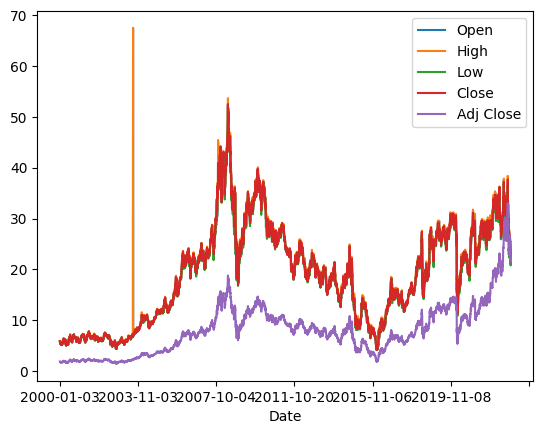

In [24]:
cotacoes_petr.plot();

* Selecionar apenas os últimos 100 dias e de Close

In [25]:
cotacoes_petr.tail(100)

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-07-27,31.299999,31.469999,30.620001,31.350000,22.335648
2022-07-28,31.590000,32.630001,31.430000,32.290001,23.005360
2022-07-29,33.599998,34.660000,32.830002,34.150002,24.330538
2022-08-01,34.000000,34.150002,33.220001,33.680000,23.995682
2022-08-02,33.770000,34.500000,33.480000,33.830002,24.102551
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


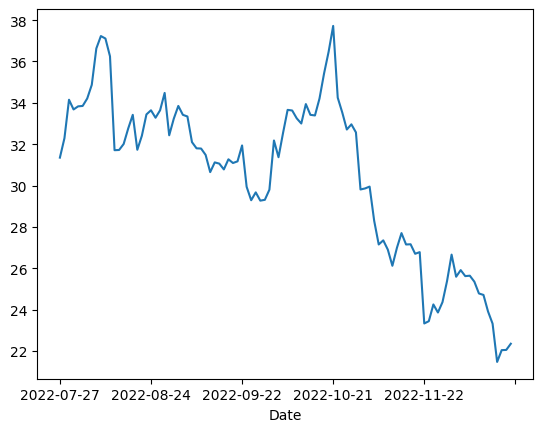

In [26]:
cotacoes_petr.tail(100).Close.plot();

* Plot dos últimos 100 dias de Close e Open

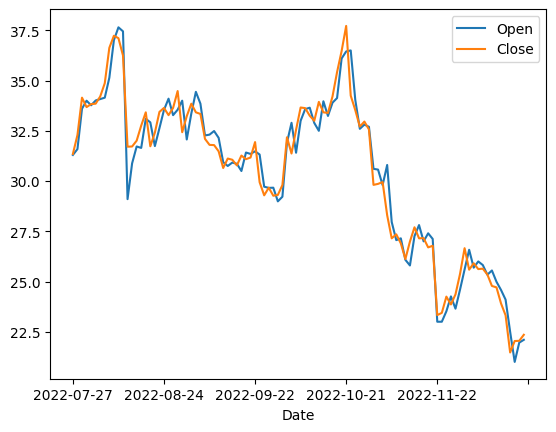

In [27]:
cotacoes_petr.tail(100)[["Open", "Close"]].plot();

In [28]:
# Selecionando 100 últimos dias sem usar .tail

cotacoes_petr[-100:]

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-07-27,31.299999,31.469999,30.620001,31.350000,22.335648
2022-07-28,31.590000,32.630001,31.430000,32.290001,23.005360
2022-07-29,33.599998,34.660000,32.830002,34.150002,24.330538
2022-08-01,34.000000,34.150002,33.220001,33.680000,23.995682
2022-08-02,33.770000,34.500000,33.480000,33.830002,24.102551
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


### 3. .loc .iloc e .shift

In [29]:
import pandas as pd

# Arrumando a tabela como estava

petr_01 = pd.read_csv('PETR4.csv')
petr_01 = petr_01.set_index('Date')
petr_01.drop(["Volume"], axis=1, inplace=True)

In [30]:
petr_01

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


Ex 1: Pegar cotação de 26/05/2021

In [31]:
petr_01.loc["2021-05-26"]

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

In [32]:
pd.DataFrame(petr_01.loc["2021-05-26"])

,2021-05-26
Open,25.910000
High,26.180000
Low,25.650000
Close,26.090000
Adj Close,12.809803


Ex 2: Filtar entre duas datas e plotar

In [33]:
petr_filtrada = petr_01.loc["2020-01-01":"2021-05-26"]

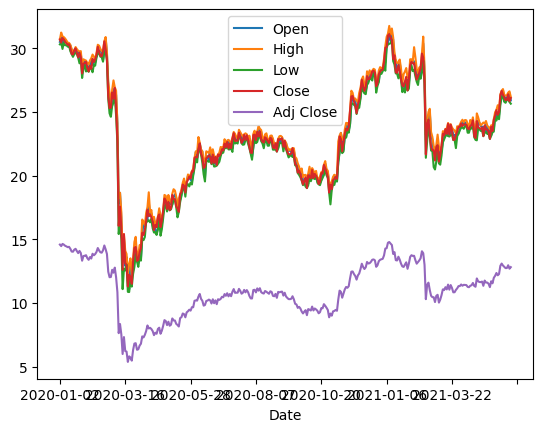

In [34]:
petr_filtrada.plot();

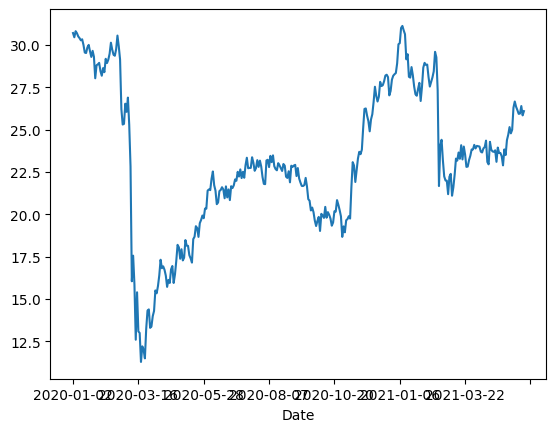

In [35]:
petr_filtrada02 = petr_01.loc["2020-01-01":"2021-05-26", "Close"]

petr_filtrada02.plot();

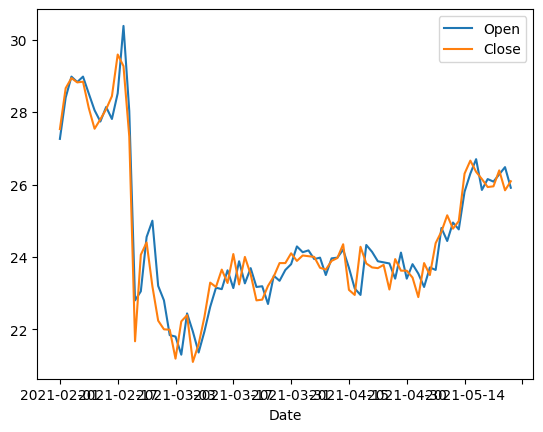

In [36]:
petr_filtrada = petr_01.loc['2021-02-01':'2021-05-26', ['Open','Close']]
petr_filtrada.plot();

* .loc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

In [37]:
# índice 0 da PETR_01

petr_01.iloc[0]

Open         5.875000
High         5.875000
Low          5.875000
Close        5.875000
Adj Close    1.872027
Name: 2000-01-03, dtype: float64

In [38]:
# índice 200

petr_01.iloc[200]

Open         6.487500
High         6.487500
Low          6.487500
Close        6.487500
Adj Close    2.067196
Name: 2000-10-09, dtype: float64

In [39]:
# Última linha

petr_01.iloc[-1]

Open         22.100000
High         22.469999
Low          21.639999
Close        22.350000
Adj Close    22.350000
Name: 2022-12-19, dtype: float64

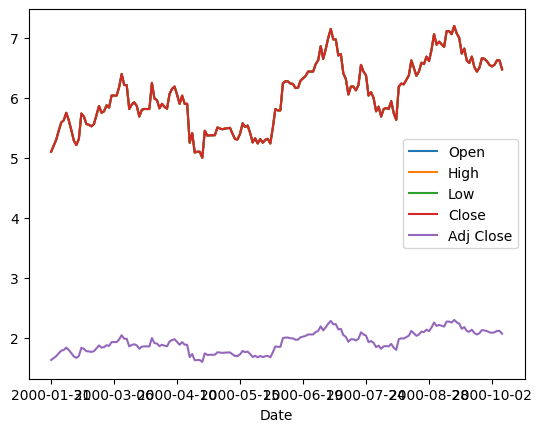

In [40]:
petr_filtrada = cotacoes_petr.iloc[20:200]
petr_filtrada.plot();

* Filtrando usando .iloc

In [41]:
petr_01.iloc[:5, [3,4]]

,Close,Adj Close
Date,,
2000-01-03,5.875,1.872027
2000-01-04,5.550,1.768469
2000-01-05,5.494,1.750625
2000-01-06,5.475,1.744570
2000-01-07,5.500,1.752536


* .shift serve para deslocar para frente ou para trás

In [42]:
petr_01.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


In [43]:
petr_01.shift(2)

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,5.875,5.875000,5.875000,5.875000,1.872027
2000-01-06,5.550,5.550000,5.550000,5.550000,1.768469
2000-01-07,5.494,5.494000,5.494000,5.494000,1.750625
...,...,...,...,...,...
2022-12-13,24.990,25.049999,24.490000,24.709999,24.709999
2022-12-14,24.580,24.660000,23.129999,23.910000,23.910000
2022-12-15,24.100,24.200001,23.309999,23.320000,23.320000


In [44]:
# Criando uma nova coluna para mostrar a diferença

cotacoes_petr['Close_anterior'] = cotacoes_petr['Close'].shift(1)

In [45]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475


### 4. Explorando Séries Temporais

In [46]:
import pandas as pd

In [47]:
petr = pd.read_csv("PETR4.csv", index_col= "Date")
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [48]:
# Verificar o tipo de index

petr.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
       '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19'],
      dtype='object', name='Date', length=5770)

In [49]:
# Convertendo

petr.index = pd.to_datetime(petr.index)
petr.index 

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=5770, freq=None)

* Manipulação de Fuso-horário

In [50]:
petr.index = petr.index.tz_localize("UTC")

In [51]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00+00:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04 00:00:00+00:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05 00:00:00+00:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06 00:00:00+00:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07 00:00:00+00:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13 00:00:00+00:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14 00:00:00+00:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15 00:00:00+00:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


* Arrumando para horário BR

In [52]:
petr.index = petr.index.tz_convert("America/Sao_Paulo")

petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


#### Biblioteca DateTime

In [53]:
from datetime import datetime, timedelta

In [54]:
data = "01/10/2023"
type(data)

str

* Convertendo Str p/DateTime


In [55]:
datetime.strptime(data, "%d/%m/%Y")

datetime.datetime(2023, 10, 1, 0, 0)

In [56]:
data_agora = datetime.now()
data_agora

datetime.datetime(2023, 11, 2, 11, 42, 17, 210234)

* Retornando como Str

In [57]:
datetime.strftime(data_agora, "%Y-%m-%d")

'2023-11-02'

In [58]:
# Retornado mês por extenso
"""
%A = Dia extenso
%B = Mês extenso
%F = Padrão Americano
"""
datetime.strftime(data_agora, "%B")

'November'

In [59]:
datetime.strftime(data_agora, "%F")

'2023-11-02'

In [60]:
# Data daqui 200 dias 

data_200_dias = datetime.now() - timedelta(days= 200)
data_200_dias

datetime.datetime(2023, 4, 16, 11, 42, 17, 325200)

#### Usando Pandas

In [61]:
data_inicio = "01-01-2023"

pd.to_datetime(data_inicio, format= "%d-%m-%Y")

Timestamp('2023-01-01 00:00:00')

* Mexendo e intervalos de tempo

In [62]:
pd.date_range("04/01/2023", periods= 10, freq= "5T")

DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:05:00',
               '2023-04-01 00:10:00', '2023-04-01 00:15:00',
               '2023-04-01 00:20:00', '2023-04-01 00:25:00',
               '2023-04-01 00:30:00', '2023-04-01 00:35:00',
               '2023-04-01 00:40:00', '2023-04-01 00:45:00'],
              dtype='datetime64[ns]', freq='5T')

* Criando variáveis auxiliares

In [63]:
# Exibindo para vermos a tabela 

petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000


In [64]:
petr["Horário"] = petr.index

In [65]:
petr["Horário"] = petr["Horário"].dt.time

In [66]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horário
Date,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00


In [67]:
petr["Dia_do_ano"] = petr.index

In [68]:
petr["Dia_do_ano"] = petr["Dia_do_ano"].dt.dayofyear

In [69]:
petr

,Open,High,Low,Close,Adj Close,Volume,Horário,Dia_do_ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000,22:00:00,6
...,...,...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348


#### Método Rsample

* Agrupar conjuntos de dados
* Se não especificar a coluna no método de agregação ".agg()", não vai agregar a coluna

Ex1: Tornar a tabela mensal, mas agregar colocado diferentes opções em cada variável

In [70]:
petr_month = petr.resample("1M").agg({"Open":"first", "High":"max", "Low":"min", "Close":"last", "Volume":"sum" })

In [71]:
petr_month

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31 00:00:00-02:00,5.875000,5.875000,5.101000,5.200000,545825280000
2000-02-29 00:00:00-03:00,5.300000,5.875000,5.213000,5.875000,525306880000
2000-03-31 00:00:00-03:00,5.838000,6.399000,5.688000,5.900000,384163840000
2000-04-30 00:00:00-03:00,5.850000,6.188000,5.000000,5.376000,582123520000
2000-05-31 00:00:00-03:00,5.506000,5.575000,5.238000,5.500000,550553600000
...,...,...,...,...,...
2022-08-31 00:00:00-03:00,33.770000,37.860001,29.080000,33.849998,2023546800
2022-09-30 00:00:00-03:00,34.439999,34.570000,28.580000,29.799999,1573005800
2022-10-31 00:00:00-03:00,31.910000,38.389999,29.160000,29.860001,2355236000


### 5. Filtrar, Renomear e Reordenar

In [72]:
petr

,Open,High,Low,Close,Adj Close,Volume,Horário,Dia_do_ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000,22:00:00,6
...,...,...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348


In [73]:
petr_filtrada = petr.iloc[:,0:4]
petr_filtrada

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


* Renomeando

In [74]:
# 1ª Maneira

petr_filtrada.columns
petr_filtrada.columns = ["Abertura", "Máxima", "Mínima", "Fechamento"]
petr_filtrada.head()

,Abertura,Máxima,Mínima,Fechamento
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


In [75]:
# 2ª Maneira

petr_filtrada = petr_filtrada.rename({"Abertura":"Open", "Máxima":"High","Mínima":"Low","Fechamento":"Close"}, axis=1)
petr_filtrada

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


In [76]:
petr_filtrada.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [77]:
# Reordenando as colunas
petr_filtrada[["Close", "High", "Open", "Low"]]

,Close,High,Open,Low
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,23.320000,24.200001,24.100000,23.309999
2022-12-13 21:00:00-03:00,21.469999,22.600000,22.500000,20.770000
2022-12-14 21:00:00-03:00,22.040001,22.370001,21.000000,20.830000


In [78]:
# Inserindo nova coluna em posição específica

dado_novo = "PETR4"

petr_filtrada.insert(0,"Ativo",dado_novo)

In [79]:
petr_filtrada

,Ativo,Open,High,Low,Close
Date,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,PETR4,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,PETR4,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,PETR4,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,PETR4,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...,...
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001


* Nova coluna com operações ".assign"

In [80]:
# Fazendo Close - Open e criando nova coluna

petr_filtrada.assign(Resultado = (petr_filtrada["Close"] - petr_filtrada["Open"]))

,Ativo,Open,High,Low,Close,Resultado
Date,,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875000,5.875000,5.875000,5.875000,0.000000
2000-01-03 22:00:00-02:00,PETR4,5.550000,5.550000,5.550000,5.550000,0.000000
2000-01-04 22:00:00-02:00,PETR4,5.494000,5.494000,5.494000,5.494000,0.000000
2000-01-05 22:00:00-02:00,PETR4,5.475000,5.475000,5.475000,5.475000,0.000000
2000-01-06 22:00:00-02:00,PETR4,5.500000,5.500000,5.500000,5.500000,0.000000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000,-0.780001
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999,-1.030001
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001,1.040001


### 6. Dataframes mais complexos, incluindo multi-index

In [81]:
tickers_IBOV = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

In [82]:
tickers_IBOV_SA = [i + ".SA" for i in tickers_IBOV]

print(tickers_IBOV_SA)

['RADL3.SA', 'BRML3.SA', 'QUAL3.SA', 'ELET3.SA', 'BBDC3.SA', 'CCRO3.SA', 'BBSE3.SA', 'JBSS3.SA', 'ENBR3.SA', 'MRVE3.SA', 'ASAI3.SA', 'CRFB3.SA', 'TOTS3.SA', 'GGBR4.SA', 'TIMS3.SA', 'IRBR3.SA', 'USIM5.SA', 'BRFS3.SA', 'BBDC4.SA', 'BRAP4.SA', 'ABEV3.SA', 'UGPA3.SA', 'PETR3.SA', 'VBBR3.SA', 'BPAC11.SA', 'ITSA4.SA', 'BPAN4.SA', 'CSAN3.SA', 'DXCO3.SA', 'TAEE11.SA', 'PCAR3.SA', 'CIEL3.SA', 'RENT3.SA', 'PRIO3.SA', 'EGIE3.SA', 'HAPV3.SA', 'LWSA3.SA', 'LREN3.SA', 'FLRY3.SA', 'CPLE6.SA', 'RRRP3.SA', 'ALPA4.SA', 'CASH3.SA', 'COGN3.SA', 'ENGI11.SA', 'VALE3.SA', 'PETZ3.SA', 'SUZB3.SA', 'EMBR3.SA', 'MRFG3.SA', 'KLBN11.SA', 'AZUL4.SA', 'CMIN3.SA', 'AMER3.SA', 'ELET6.SA', 'BRKM5.SA', 'BEEF3.SA', 'CSNA3.SA', 'MGLU3.SA', 'SLCE3.SA', 'PETR4.SA', 'POSI3.SA', 'GOLL4.SA', 'SBSP3.SA', 'CYRE3.SA', 'EQTL3.SA', 'RDOR3.SA', 'GOAU4.SA', 'WEGE3.SA', 'ECOR3.SA', 'ARZZ3.SA', 'NTCO3.SA', 'CPFE3.SA', 'IGTI11.SA', 'EZTC3.SA', 'B3SA3.SA', 'CMIG4.SA', 'RAIL3.SA', 'RAIZ4.SA', 'HYPE3.SA', 'ITUB4.SA', 'ENEV3.SA', 'BBAS3.SA'

In [83]:
import yfinance as yf

cotacoes_ibov = yf.download(tickers_IBOV_SA, start="2021-01-01", end="2021-12-31", period="1d")

[****************      33%%                      ]  30 of 91 completed

[*********************100%%**********************]  91 of 91 completed


2 Failed downloads:
['BRML3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ENBR3.SA']: Exception('%ticker%: No data found, symbol may be delisted')


In [84]:
# Como retornou 2 erros, vamos ler o .csv
import pandas as pd
cotacoes_ibov = pd.read_csv("cotacoes_ibov.csv", header= [0, 1], index_col=0)
cotacoes_ibov

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191311  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.918273  27.293526  13.814717  16.406240  ...   2893300   
2021-12-27  10.851112  27.349573  13.959242  16.593836  ...   7282600   
2021-12-28  10.707198  27.190779  13.950742  16.534149  ...   3367300   
2021-12-29  10.630445  27.050669  13.848725  16.457407  ...   2589100   
2021-12-30  10.688011  26.947922  13.763711  16.380655  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

In [85]:
# Visualizando as colunas

set(cotacoes_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [86]:
# Filtrando só Adj Close

cotacoes_ibov_adjclose = cotacoes_ibov["Adj Close"]
cotacoes_ibov_adjclose

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.085717,41.191311,73.699677,65.592361,NaN,37.730000,18.484877,32.590820,17.390409,19.593058,...,13.305786,27.178003,22.572634,13.088718,70.937424,19.035427,16.170000,39.802071,36.239857,33.214291
2021-01-05,14.385996,41.211086,72.052757,64.589180,NaN,38.200001,18.521252,32.252686,17.307268,19.473595,...,13.001496,27.050728,22.385464,13.228893,72.131859,19.253225,16.219999,39.464180,38.464172,33.380360
2021-01-06,14.677173,38.966091,67.347267,60.769394,NaN,36.669998,18.218121,32.989651,17.742348,20.119007,...,12.641879,25.768194,22.114069,13.868436,74.497482,18.974443,15.490000,39.022320,39.484058,32.051792
2021-01-07,14.604377,38.273796,65.984634,60.692226,NaN,36.049999,18.727379,34.298828,18.177422,20.653145,...,12.439018,25.699663,22.787878,14.534259,79.360558,19.322920,15.080000,38.034630,41.115871,32.452320
2021-01-08,15.041145,40.251770,70.582291,61.830452,NaN,36.599998,19.003229,34.498245,18.037317,20.475096,...,13.001496,27.412970,23.377462,14.464172,79.112366,19.863052,15.530000,39.030979,43.602440,33.556202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,14.771684,36.379086,30.124914,72.385445,13.949898,26.459999,10.918273,27.293526,13.814717,16.406240,...,12.282347,28.287695,13.673858,14.098693,72.218063,20.026421,4.500000,45.335297,32.883457,20.177137
2021-12-27,14.752684,36.488602,31.271875,73.107651,13.504373,25.670000,10.851112,27.349573,13.959242,16.593836,...,12.301435,28.356592,13.951743,14.269472,72.035568,20.283413,4.860000,45.062576,32.588711,19.919092
2021-12-28,14.743185,36.588161,30.419008,73.293076,12.969742,25.750000,10.707198,27.190779,13.950742,16.534149,...,12.177370,27.874308,13.999654,13.994329,70.301971,20.435705,4.950000,44.861103,32.706608,20.703154


In [87]:
# Só Adj Close de ALPA4.SA

cotacoes_ibov_adjclose_alpa = cotacoes_ibov[("Adj Close", "ALPA4.SA")]

cotacoes_ibov_adjclose_alpa

Date
2021-01-04    41.191311
2021-01-05    41.211086
2021-01-06    38.966091
2021-01-07    38.273796
2021-01-08    40.251770
                ...    
2021-12-23    36.379086
2021-12-27    36.488602
2021-12-28    36.588161
2021-12-29    36.189922
2021-12-30    36.856972
Name: (Adj Close, ALPA4.SA), Length: 247, dtype: float64

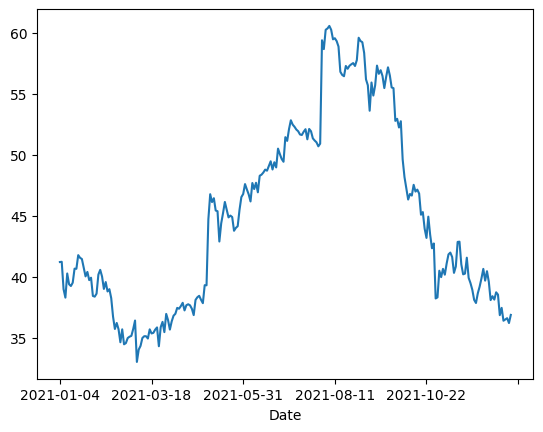

In [88]:
cotacoes_ibov_adjclose_alpa.plot();

### 7. Manejo dos NAs e NaN

In [89]:
cotacoes_ibov.isna()

Adj Close                                                        \
            ABEV3.SA ALPA4.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                         
2021-01-04     False    False    False    False     True    False    False   
2021-01-05     False    False    False    False     True    False    False   
2021-01-06     False    False    False    False     True    False    False   
2021-01-07     False    False    False    False     True    False    False   
2021-01-08     False    False    False    False     True    False    False   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23     False    False    False    False    False    False    False   
2021-12-27     False    False    False    False    False    False    False   
2021-12-28     False    False    False    False    False    False    False   
2021-12-29     False    False    False    False    False    False    False   
2021-12-30     False    False    False    False    False    False    False   

                                       ...   Volume                    \
           BBAS3.SA BBDC3.SA BBDC4.SA  ... TIMS3.SA TOTS3.SA UGPA3.SA   
Date                                   ...                              
2021-01-04    False    False    False  ...    False    False    False   
2021-01-05    False    False    False  ...    False    False    False   
2021-01-06    False    False    False  ...    False    False    False   
2021-01-07    False    False    False  ...    False    False    False   
2021-01-08    False    False    False  ...    False    False    False   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-23    False    False    False  ...    False    False    False   
2021-12-27    False    False    False  ...    False    False    False   
2021-12-28    False    False    False  ...    False    False    False   
2021-12-29    False    False    False  ...    False    False    False   
2021-12-30    False    False    False  ...    False    False    False   

                                                                           
           USIM5.SA VALE3.SA VBBR3.SA VIIA3.SA VIVT3.SA WEGE3.SA YDUQ3.SA  
Date                                                                       
2021-01-04    False    False    False    False    False    False    False  
2021-01-05    False    False    False    False    False    False    False  
2021-01-06    False    False    False    False    False    False    False  
2021-01-07    False    False    False    False    False    False    False  
2021-01-08    False    False    False    False    False    False    False  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-23    False    False    False    False    False    False    False  
2021-12-27    False    False    False    False    False    False    False  
2021-12-28    False    False    False    False    False    False    False  
2021-12-29    False    False    False    False    False    False    False  
2021-12-30    False    False    False    False    False    False    False  

[247 rows x 546 columns]

In [90]:
# Vemos que há 37 valores ausentes em ASAI3

cotacoes_ibov.isna().sum()

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ARZZ3.SA     0
           ASAI3.SA    37
                       ..
Volume     VBBR3.SA     0
           VIIA3.SA     0
           VIVT3.SA     0
           WEGE3.SA     0
           YDUQ3.SA     0
Length: 546, dtype: int64

In [91]:
count_null = cotacoes_ibov.isna().sum()

In [92]:
# Tabela tem 247 linhas

cotacoes_ibov.shape[0]

247

In [93]:
# Tabela tem 546 colunas

cotacoes_ibov.shape[1]

546

* Medir o % de missings

In [94]:
count_null/cotacoes_ibov.shape[0]

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           AMER3.SA    0.000000
           ARZZ3.SA    0.000000
           ASAI3.SA    0.149798
                         ...   
Volume     VBBR3.SA    0.000000
           VIIA3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 546, dtype: float64

In [95]:
cotacoes_ibov.isna().sum(0)>1

Adj Close  ABEV3.SA    False
           ALPA4.SA    False
           AMER3.SA    False
           ARZZ3.SA    False
           ASAI3.SA     True
                       ...  
Volume     VBBR3.SA    False
           VIIA3.SA    False
           VIVT3.SA    False
           WEGE3.SA    False
           YDUQ3.SA    False
Length: 546, dtype: bool

In [96]:
cotacoes_ibov.columns[cotacoes_ibov.isna().sum(0)>=1]

MultiIndex([('Adj Close',  'ASAI3.SA'),
            ('Adj Close',  'CMIN3.SA'),
            ('Adj Close', 'IGTI11.SA'),
            ('Adj Close',  'RAIZ4.SA'),
            (    'Close',  'ASAI3.SA'),
            (    'Close',  'CMIN3.SA'),
            (    'Close', 'IGTI11.SA'),
            (    'Close',  'RAIZ4.SA'),
            (     'High',  'ASAI3.SA'),
            (     'High',  'CMIN3.SA'),
            (     'High', 'IGTI11.SA'),
            (     'High',  'RAIZ4.SA'),
            (      'Low',  'ASAI3.SA'),
            (      'Low',  'CMIN3.SA'),
            (      'Low', 'IGTI11.SA'),
            (      'Low',  'RAIZ4.SA'),
            (     'Open',  'ASAI3.SA'),
            (     'Open',  'CMIN3.SA'),
            (     'Open', 'IGTI11.SA'),
            (     'Open',  'RAIZ4.SA'),
            (   'Volume',  'ASAI3.SA'),
            (   'Volume',  'CMIN3.SA'),
            (   'Volume', 'IGTI11.SA'),
            (   'Volume',  'RAIZ4.SA')],
           )

In [97]:
cotacoes_ibov_filterNA = cotacoes_ibov.drop(cotacoes_ibov.columns[cotacoes_ibov.isna().sum(0)>=1], axis=1)

In [98]:
count_na = cotacoes_ibov_filterNA.isna().sum()

In [99]:
max(count_na)

0

* Exercício com Yfinance

In [100]:
import yfinance as yf

dados = yf.download("BBAS3.SA", start="2022-12-28", end="2023-01-03")[["Open", "Close"]]

[*********************100%%**********************]  1 of 1 completed


In [101]:
dados

,Open,Close
Date,,
2022-12-28,34.099998,34.669998
2022-12-29,34.830002,34.730000
2023-01-02,34.220001,33.259998


In [102]:
# Criando dias 

dados = dados.asfreq("D")

In [103]:
# Vamos shiftar em 1 dia pra frente

dados["Shift"] = dados.Close.shift(1)

In [104]:
dados

,Open,Close,Shift
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,NaN,NaN,34.730000
2022-12-31,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN
2023-01-02,34.220001,33.259998,NaN


In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2022-12-28 to 2023-01-02
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3 non-null      float64
 1   Close   3 non-null      float64
 2   Shift   2 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


* Testando .dropna


In [106]:
dados_dropna = dados.dropna(axis = 0)
dados_dropna

,Open,Close,Shift
Date,,,
2022-12-29,34.830002,34.73,34.669998


* Usando .dropna, mas pssando critérios em "tresh"

In [107]:
dados_dropna = dados.dropna(axis = 0, thresh = 2)
dados_dropna 

,Open,Close,Shift
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2023-01-02,34.220001,33.259998,NaN


* .fillna serve para preencher os Missings

In [108]:
dadosfill = dados.fillna(0)
dadosfill 

,Open,Close,Shift
Date,,,
2022-12-28,34.099998,34.669998,0.000000
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,0.000000,0.000000,34.730000
2022-12-31,0.000000,0.000000,0.000000
2023-01-01,0.000000,0.000000,0.000000
2023-01-02,34.220001,33.259998,0.000000


* Tem como preencher cada coluna com um critério

In [109]:
dados_dict = dados.fillna({"Open": 0, "Close": 1})
dados_dict 

,Open,Close,Shift
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,0.000000,1.000000,34.730000
2022-12-31,0.000000,1.000000,NaN
2023-01-01,0.000000,1.000000,NaN
2023-01-02,34.220001,33.259998,NaN


* __ffill e bfill__

-> Forward Fill (ffill)
* passa o valor prévio "para a frente", ou seja, preenche com o valor prévio disponível (útil em séries temporais)

In [110]:
dados.Close.ffill()

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    34.730000
2022-12-31    34.730000
2023-01-01    34.730000
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

-> Backward Fill (bfill)
*  traz o próximo valor disponível para trás

In [111]:
dados.Close.bfill()

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    33.259998
2022-12-31    33.259998
2023-01-01    33.259998
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

* Tem como preencher os NaN usando médias ou medianas, por exemplo.

* Tem como interpolar os dados e usar pra preencher NaN

In [112]:
dados['Interpolate'] = dados.Close.interpolate(method = 'linear')

In [113]:
dados

,Open,Close,Shift,Interpolate
Date,,,,
2022-12-28,34.099998,34.669998,NaN,34.669998
2022-12-29,34.830002,34.730000,34.669998,34.730000
2022-12-30,NaN,NaN,34.730000,34.362499
2022-12-31,NaN,NaN,NaN,33.994999
2023-01-01,NaN,NaN,NaN,33.627499
2023-01-02,34.220001,33.259998,NaN,33.259998


#### Visualização para dados de cotações em séries longas

In [114]:
import pandas as pd

dados_novo = pd.read_csv('Bovespa.csv')

In [115]:
dados_novo.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [116]:
dados_novo.index = pd.to_datetime(dados_novo.Date)

In [117]:
acao = "CYRE3"

In [118]:
cyre = dados_novo[acao]
cyre = pd.DataFrame(cyre)

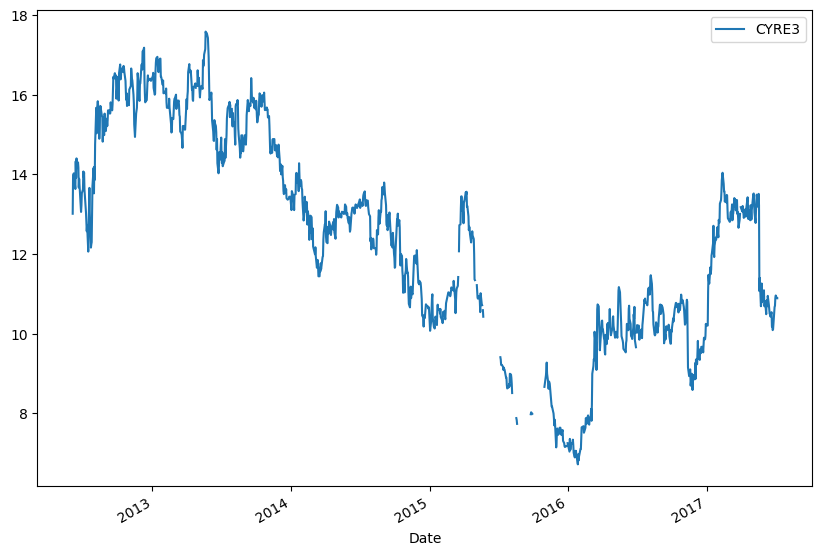

In [119]:
cyre.plot(figsize=(10, 7));

* Vamos usar Forward Filling para preencher!

In [120]:
cyre2 = cyre.ffill(axis = 0)

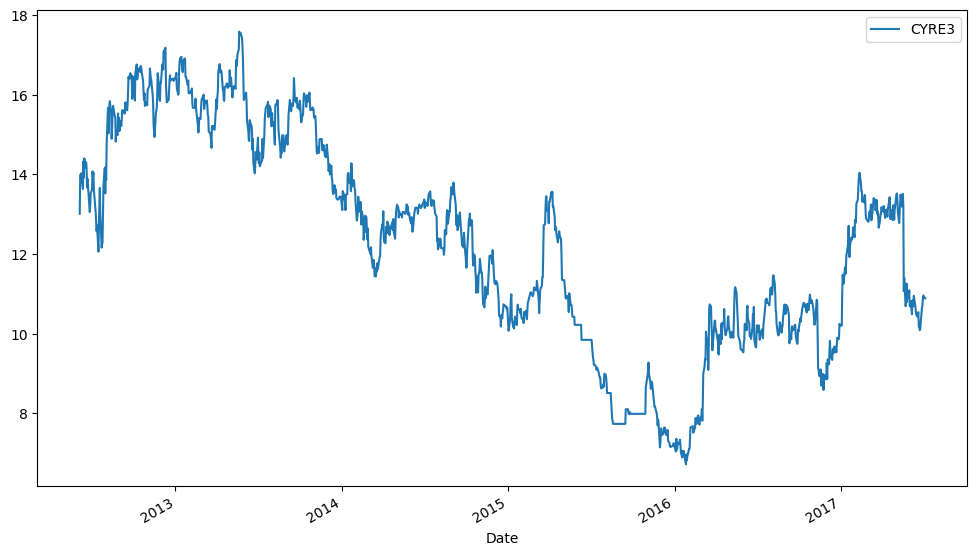

In [121]:
cyre2.plot(figsize = (12,7));

#### Biblioteca missingno
* Boa para analisar os missing
* Matrix serve para analisarmos quando os missing acontecem
* Barras (Bar) ajudam a visualizar a quantidade de ocorrências
* Mapa de Calor (Heatmap) ajuda a visualizar a correlação


In [122]:
import missingno as msno

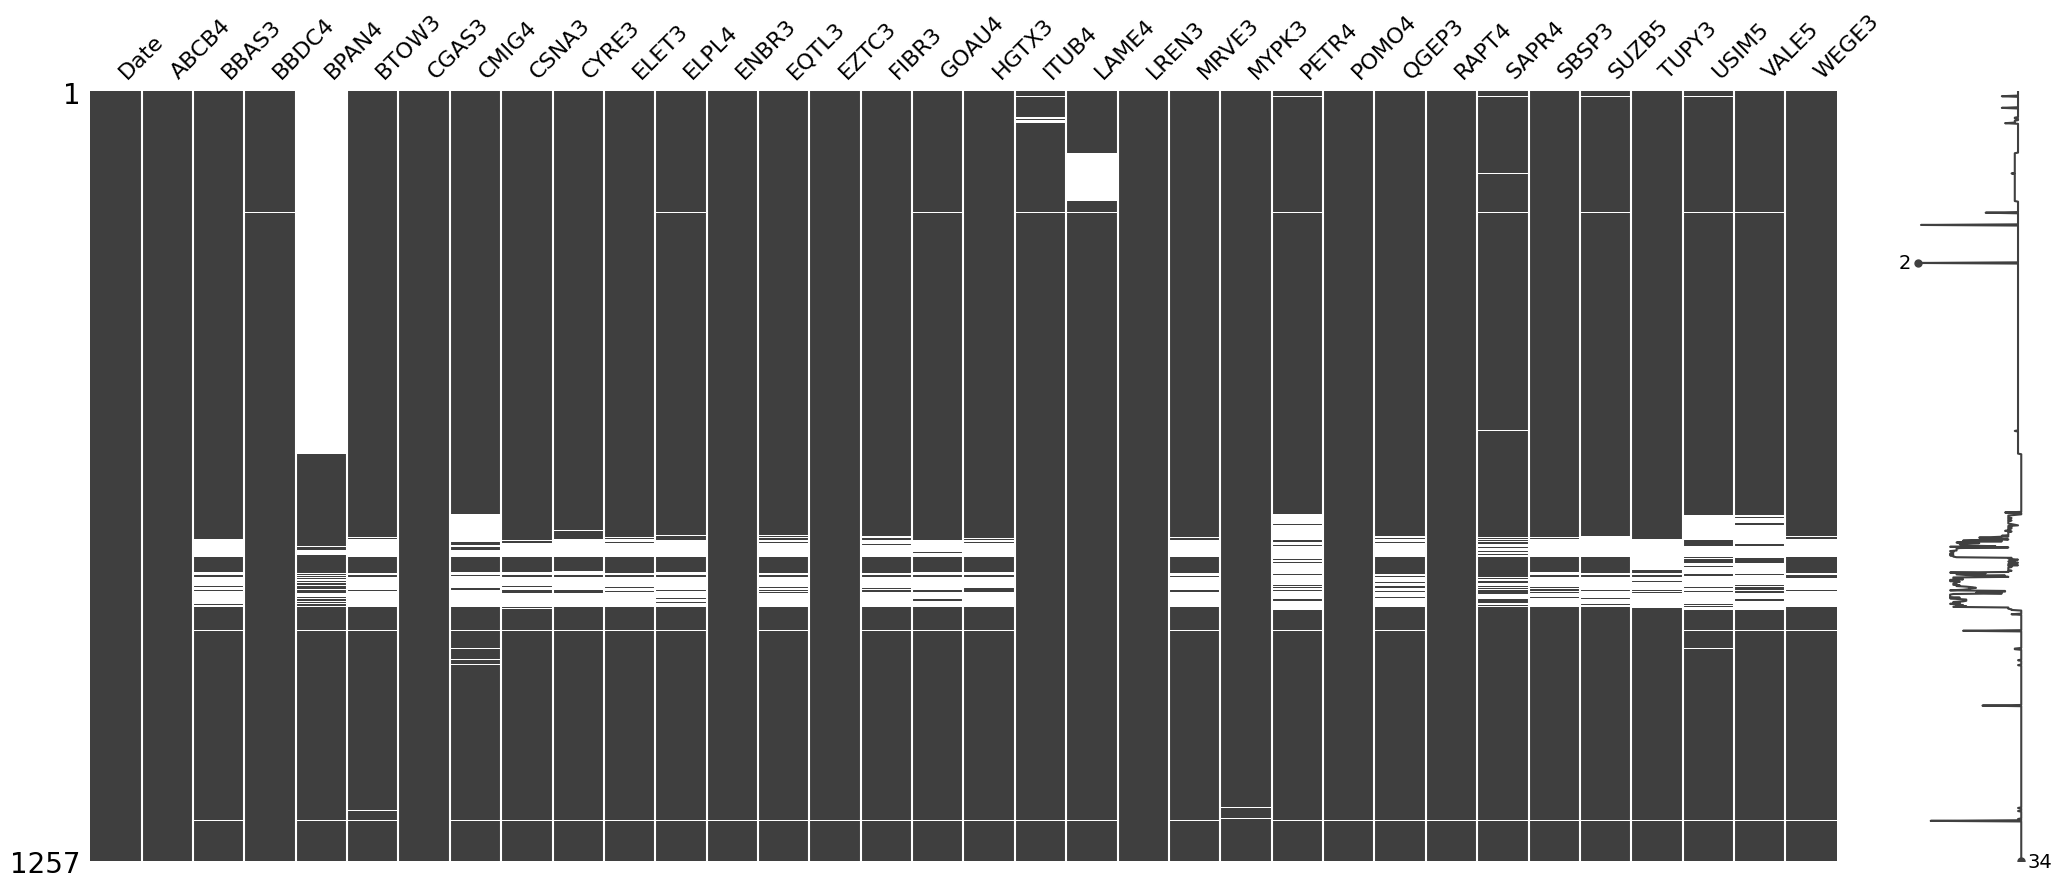

In [123]:
msno.matrix(dados_novo);

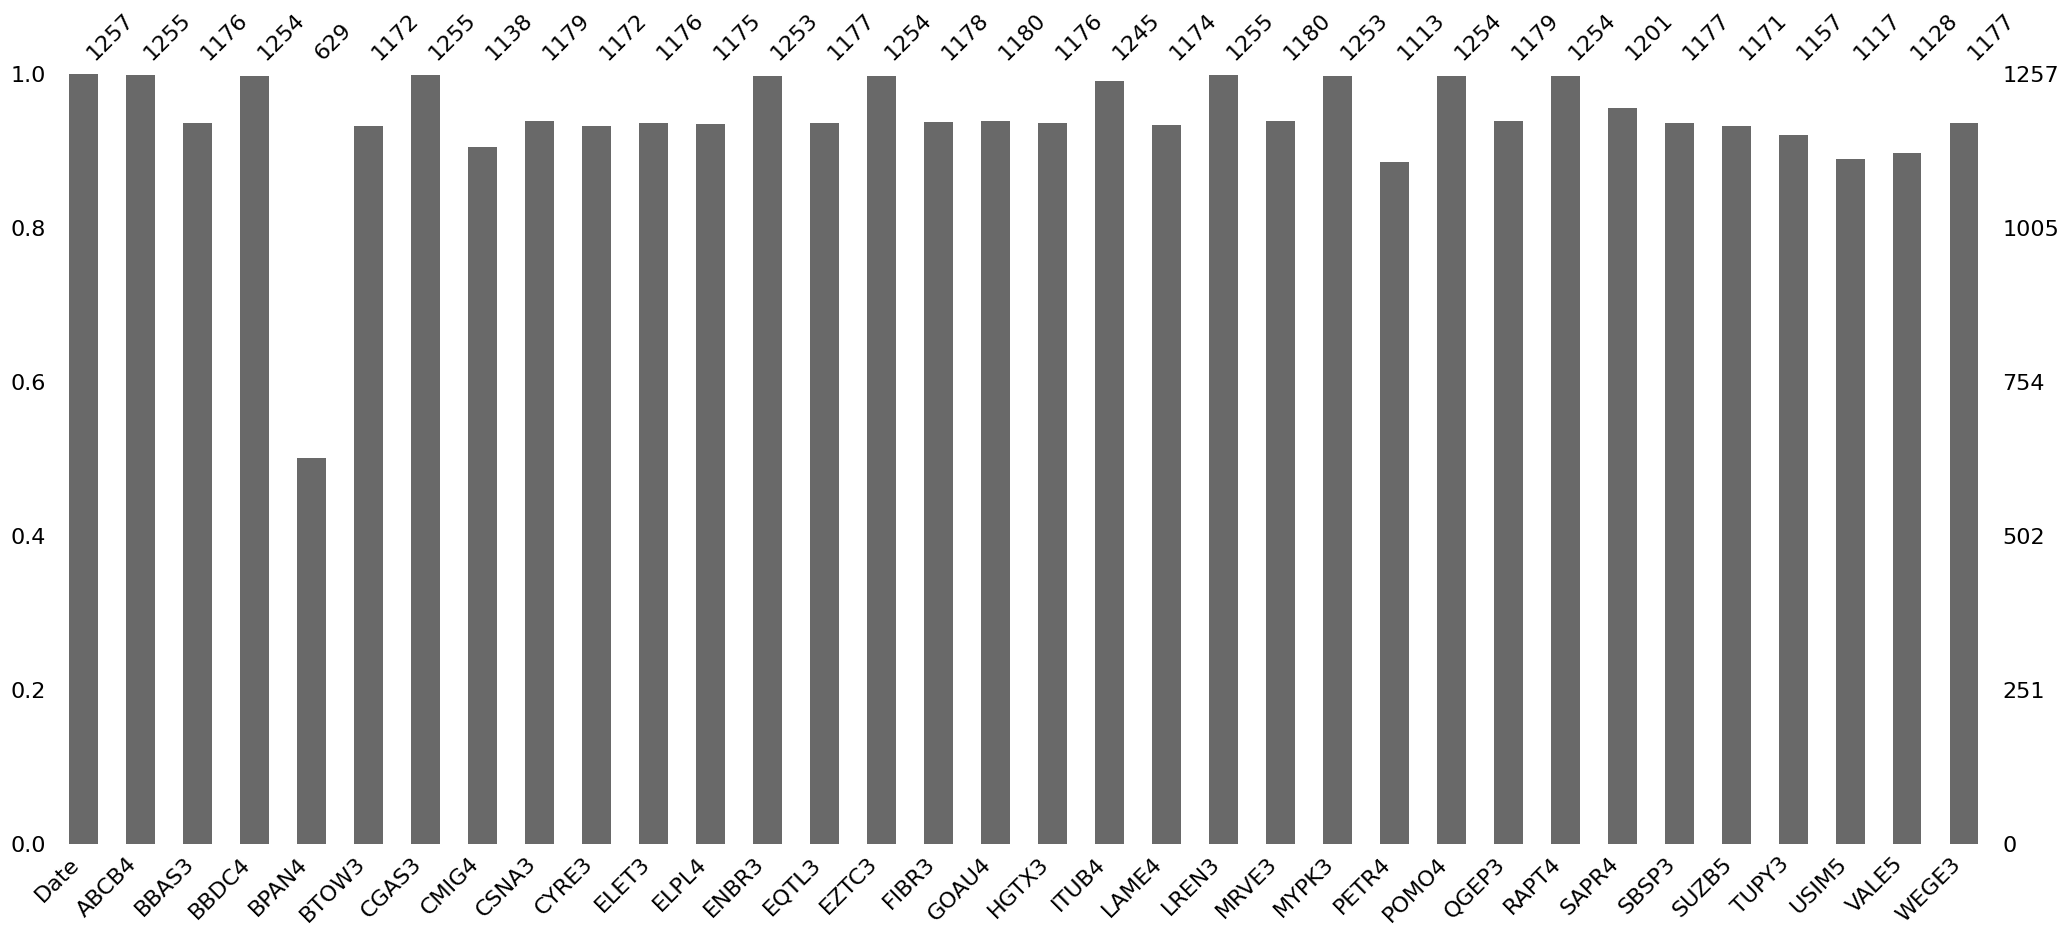

In [124]:
msno.bar(dados_novo);

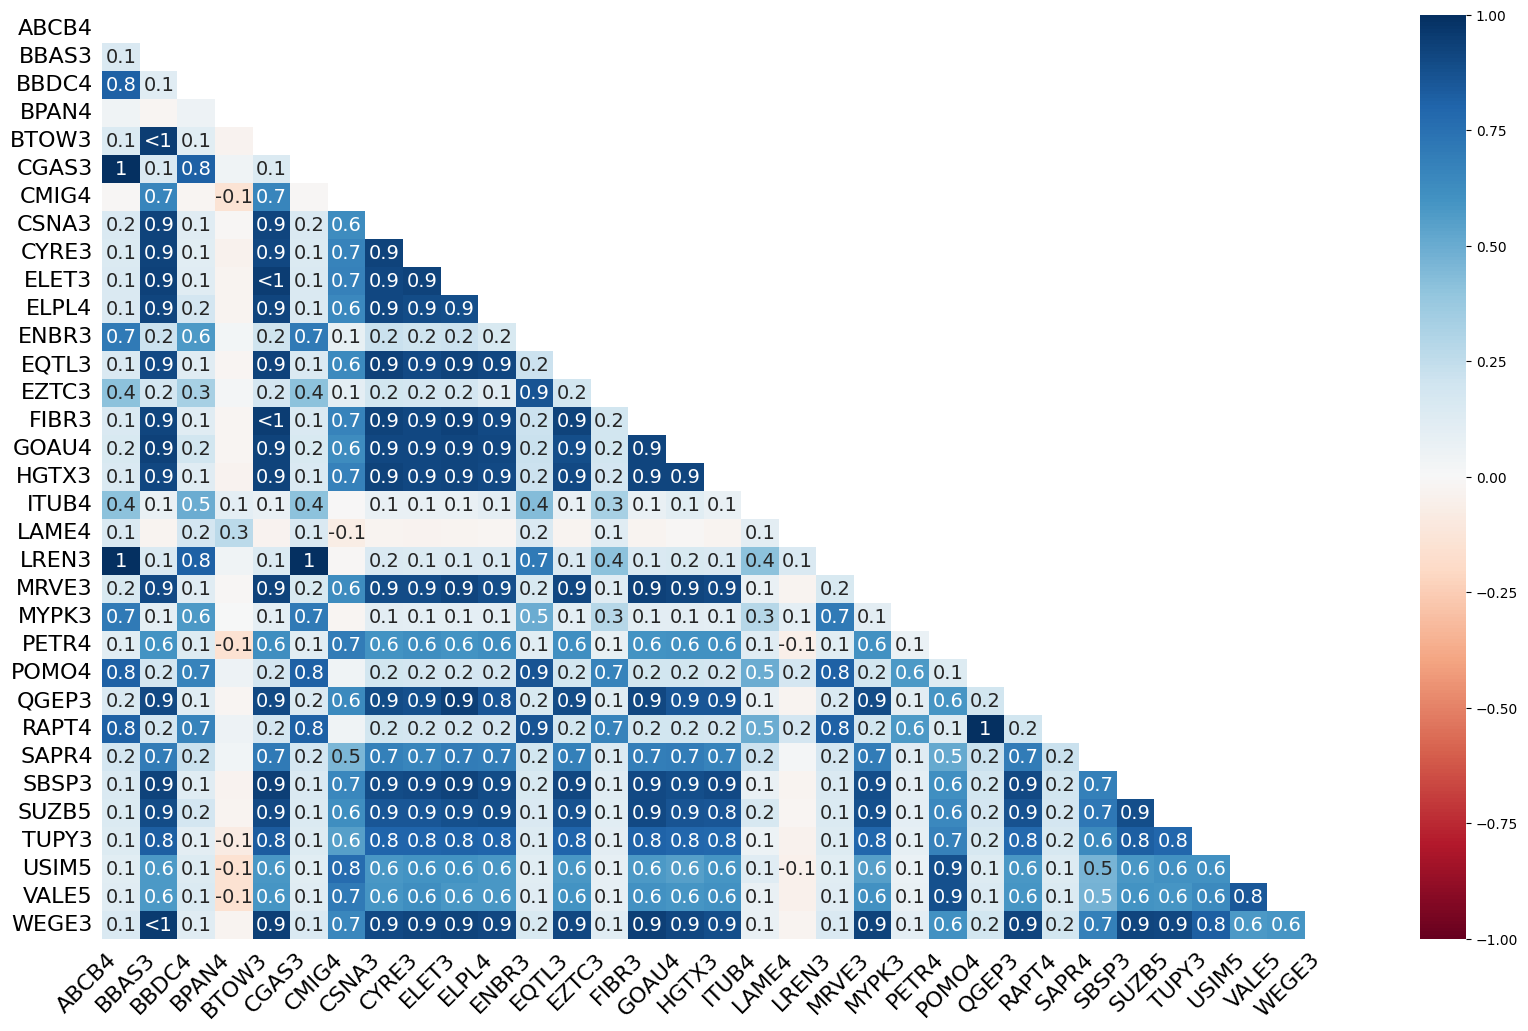

In [125]:
msno.heatmap(dados_novo);

### 8. Redução do número de colunas - "Wide to Long"

In [126]:
import pandas as pd

In [127]:
cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)
cotacoes_ibov = cotacoes_csv

In [128]:
cotacoes_ibov.head()

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA ASAI3.SA   AZUL4.SA   
Date                                                                         
2021-01-04  14.085717  41.191311  73.699677  65.592361      NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180      NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394      NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226      NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452      NaN  36.599998   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  

[5 rows x 546 columns]

__Melt__
* Usar "Wide to Long"
* pd.melt()

In [129]:
cotacoes_ibov_longo = pd.melt(cotacoes_ibov, ignore_index = False)

In [130]:
cotacoes_ibov_longo

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


* Usando filtros aqui

In [131]:
cotacoes_ibov_longo_abev = cotacoes_ibov_longo[(cotacoes_ibov_longo["variable_0"] == "Close") & (cotacoes_ibov_longo["variable_1"] == "ABEV3.SA")]

In [132]:
cotacoes_ibov_longo_abev

,variable_0,variable_1,value
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550000
2021-12-27,Close,ABEV3.SA,15.530000
2021-12-28,Close,ABEV3.SA,15.520000


* Plotando Close de ABEV3

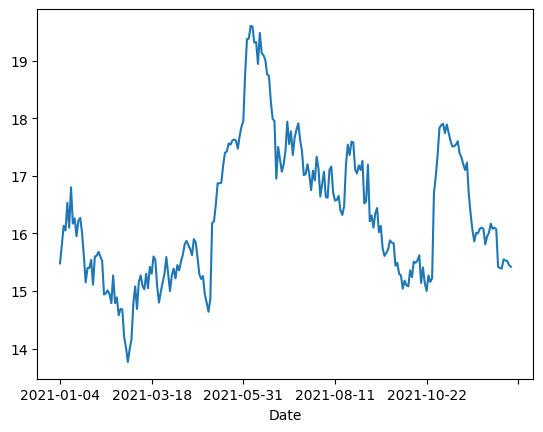

In [133]:
cotacoes_ibov_longo_abev.value.plot();

* Mudando nome das colunas

In [134]:
cotacoes_ibov_longo.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

In [135]:
cotacoes_ibov_longo.columns = ["Parametro", "Ativo", "Valor"]

In [136]:
cotacoes_ibov_longo.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


__Pivot__
* Volta o melted para longo

1- Quando é multi index 
* Precisa passar corretamente as variáveis em columns

In [137]:
cotacoes_ibov_longo_retorno = cotacoes_ibov_longo.pivot(columns = ['Parametro', 'Ativo'], values = 'Valor')

In [138]:
cotacoes_ibov_longo_retorno

Parametro   Adj Close                                                         \
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191311  73.699677  65.592361        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  64.589180        NaN  38.200001   
2021-01-06  14.677173  38.966091  67.347267  60.769394        NaN  36.669998   
2021-01-07  14.604377  38.273796  65.984634  60.692226        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.830452        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  72.385445  13.949898  26.459999   
2021-12-27  14.752684  36.488602  31.271875  73.107651  13.504373  25.670000   
2021-12-28  14.743185  36.588161  30.419008  73.293076  12.969742  25.750000   
2021-12-29  14.676688  36.189922  30.409204  72.590401  12.712327  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.922897  12.831134  24.360001   

Parametro                                               ...      Volume  \
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  18.484877  32.590820  17.390409  19.593058  ...   3897800.0   
2021-01-05  18.521252  32.252686  17.307268  19.473595  ...   8506600.0   
2021-01-06  18.218121  32.989651  17.742348  20.119007  ...   9998400.0   
2021-01-07  18.727379  34.298828  18.177422  20.653145  ...  11072300.0   
2021-01-08  19.003229  34.498245  18.037317  20.475096  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.918273  27.293526  13.814717  16.406240  ...   2893300.0   
2021-12-27  10.851112  27.349573  13.959242  16.593836  ...   7282600.0   
2021-12-28  10.707198  27.190779  13.950742  16.534149  ...   3367300.0   
2021-12-29  10.630445  27.050669  13.848725  16.457407  ...   2589100.0   
2021-12-30  10.688011  26.947922  13.763711  16.380655  ...   7149400.0   

Parametro                                                             \
Ativo        TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

Parametro                                                 
Ativo         VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  30613400.0  1382200.0   2166400.0  1731000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  20530

2- Quando é single index

In [139]:
cotacoes_ibov_abev = cotacoes_ibov_longo[cotacoes_ibov_longo['Ativo'] == 'ABEV3.SA']

In [140]:
cotacoes_ibov_abev

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,ABEV3.SA,1.063470e+07
2021-12-27,Volume,ABEV3.SA,8.437200e+06
2021-12-28,Volume,ABEV3.SA,7.701300e+06


In [141]:
cotacoes_ibov_abev.pivot(columns= "Parametro", values= "Valor")

Parametro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,14.085717,15.480000,15.85,15.380000,15.790000,17835200.0
2021-01-05,14.385996,15.810000,16.02,15.230000,15.370000,37105800.0
2021-01-06,14.677173,16.129999,16.23,15.630000,15.660000,28371600.0
2021-01-07,14.604377,16.049999,16.24,15.910000,16.030001,32540100.0
2021-01-08,15.041145,16.530001,16.75,16.030001,16.100000,30188800.0
...,...,...,...,...,...,...
2021-12-23,14.771684,15.550000,15.67,15.340000,15.400000,10634700.0
2021-12-27,14.752684,15.530000,15.65,15.480000,15.550000,8437200.0
2021-12-28,14.743185,15.520000,15.57,15.400000,15.540000,7701300.0


### 9. Filtros mais complexos

In [142]:
cotacoes_ibov_longo

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [143]:
# Fazer copia do DataFrame

df_cotacoes = cotacoes_ibov_longo.copy()

In [144]:
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


* Filtrando pra Adj Close


In [145]:
df_cotacoes_adjclose = df_cotacoes[df_cotacoes["Parametro"] == "Adj Close"]

In [146]:
df_cotacoes_adjclose

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,20.177137
2021-12-27,Adj Close,YDUQ3.SA,19.919092
2021-12-28,Adj Close,YDUQ3.SA,20.703154


* Filtrando Adj Close e < 10

In [147]:
df_cotacoes_lowcost = df_cotacoes[(df_cotacoes["Parametro"] == "Adj Close") & (df_cotacoes["Valor"] < 10)]

In [148]:
df_cotacoes_lowcost 

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,BEEF3.SA,8.680282
2021-01-05,Adj Close,BEEF3.SA,8.507367
2021-01-06,Adj Close,BEEF3.SA,8.386327
2021-01-07,Adj Close,BEEF3.SA,8.343099
2021-01-08,Adj Close,BEEF3.SA,8.412264
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


In [149]:
# Vendo quais são as ações que foram negociadas a menos de R$ 10,00 neste período 

set(df_cotacoes_lowcost.Ativo)

{'BEEF3.SA',
 'BPAN4.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'POSI3.SA',
 'RAIZ4.SA',
 'VIIA3.SA'}

* Cotações maiores que R$ 8,00 e menores que R$ 10,00

In [150]:
df_cotacoes[(df_cotacoes["Parametro"] == "Adj Close") & (df_cotacoes["Valor"] < 10) & (df_cotacoes["Valor"] > 8)]

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,BEEF3.SA,8.680282
2021-01-05,Adj Close,BEEF3.SA,8.507367
2021-01-06,Adj Close,BEEF3.SA,8.386327
2021-01-07,Adj Close,BEEF3.SA,8.343099
2021-01-08,Adj Close,BEEF3.SA,8.412264
...,...,...,...
2021-10-06,Adj Close,VIIA3.SA,8.120000
2021-10-08,Adj Close,VIIA3.SA,8.060000
2021-10-13,Adj Close,VIIA3.SA,8.210000


In [151]:
set(df_cotacoes[(df_cotacoes["Parametro"] == "Adj Close") & (df_cotacoes["Valor"] < 10) & (df_cotacoes["Valor"] > 8)].Ativo)

{'BEEF3.SA',
 'BPAN4.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'POSI3.SA',
 'VIIA3.SA'}

__Exercício__

Calcule a média do volume de negociação de PETR4

In [152]:
# 1 - Relembrando o formato do DataFrame

df_cotacoes.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [153]:
# 2 - Filtar por Volume e PETR4

df_cotacoes_petr_vol = df_cotacoes[(df_cotacoes["Parametro"] == "Volume") & (df_cotacoes["Ativo"] == "PETR4.SA")]

In [154]:
# 3 - Exibir para analisar se deu certo

df_cotacoes_petr_vol

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,PETR4.SA,74719700.0
2021-01-05,Volume,PETR4.SA,95181100.0
2021-01-06,Volume,PETR4.SA,96562500.0
2021-01-07,Volume,PETR4.SA,56171300.0
2021-01-08,Volume,PETR4.SA,67136300.0
...,...,...,...
2021-12-23,Volume,PETR4.SA,28713600.0
2021-12-27,Volume,PETR4.SA,44227900.0
2021-12-28,Volume,PETR4.SA,30688100.0


In [155]:
# 4 - Realizar a média sobre os valores do volume

df_cotacoes_petr_vol["Valor"].mean()

79133021.86234818

* Comparando os volumes

In [156]:
df_cotacoes[df_cotacoes["Valor"] > df_cotacoes_petr_vol["Valor"].mean()]

,Parametro,Ativo,Valor
Date,,,
2021-10-28,Volume,ABEV3.SA,91395500.0
2021-02-22,Volume,B3SA3.SA,99958200.0
2021-02-26,Volume,B3SA3.SA,88703700.0
2021-03-02,Volume,B3SA3.SA,107847900.0
2021-03-03,Volume,B3SA3.SA,93766500.0
...,...,...,...
2021-04-27,Volume,VIIA3.SA,84091000.0
2021-06-01,Volume,VIIA3.SA,79602100.0
2021-08-12,Volume,VIIA3.SA,101028200.0


In [157]:
# Exibir os ativos que tiveram volume maior do que a média de PETR4

set(df_cotacoes[df_cotacoes["Valor"] > df_cotacoes_petr_vol["Valor"].mean()].Ativo)

{'ABEV3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC4.SA',
 'BRFS3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'MGLU3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'RAIZ4.SA',
 'USIM5.SA',
 'VBBR3.SA',
 'VIIA3.SA'}

#### **Filtros com mais de uma condição, incluindo "ou"**

In [158]:
# Precisamos arrumar o index

df_cotacoes.index

Index(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       ...
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Date', length=134862)

In [159]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [160]:
df_cotacoes.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=134862, freq=None)

In [161]:
df_cotacoes[(df_cotacoes.Parametro == "Adj Close") & ((df_cotacoes.Valor < 10) | (df_cotacoes.Valor > 80))]

,Parametro,Ativo,Valor
Date,,,
2021-01-18,Adj Close,AMER3.SA,80.532433
2021-01-20,Adj Close,AMER3.SA,85.777092
2021-01-21,Adj Close,AMER3.SA,88.022003
2021-01-22,Adj Close,AMER3.SA,87.551445
2021-01-26,Adj Close,AMER3.SA,84.159576
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


#### **Filtro com base em lista**
* Usar .isin

In [162]:
ativos_churrasco = ['ABEV3.SA','JBSS3.SA','CRFB3.SA','KLBN11.SA','RADL3.SA']

In [163]:
df_cotacoes_churras = df_cotacoes[df_cotacoes["Ativo"].isin(ativos_churrasco)]

In [164]:
df_cotacoes_churras

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,RADL3.SA,4.679500e+06
2021-12-27,Volume,RADL3.SA,2.803000e+06
2021-12-28,Volume,RADL3.SA,2.103100e+06


* Sem alguma lista
* Usar "~"

In [165]:
alguns_bancos = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BIDI11.SA']

In [166]:
df_cotacoes_sembancos = df_cotacoes[~df_cotacoes["Ativo"].isin(alguns_bancos)]

In [167]:
df_cotacoes_sembancos

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


#### **Filtro com base em date range**

In [168]:
ibov_date_range = pd.date_range(start='2021-03-21',end='2021-03-31')

In [169]:
ibov_date_range

# Retorna já em formato datetime

DatetimeIndex(['2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [170]:
# Filtrando por esta data

df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

,Parametro,Ativo,Valor
Date,,,
2021-03-22,Adj Close,ABEV3.SA,1.420771e+01
2021-03-23,Adj Close,ABEV3.SA,1.378714e+01
2021-03-24,Adj Close,ABEV3.SA,1.353115e+01
2021-03-25,Adj Close,ABEV3.SA,1.370486e+01
2021-03-26,Adj Close,ABEV3.SA,1.385114e+01
...,...,...,...
2021-03-25,Volume,YDUQ3.SA,2.433000e+06
2021-03-26,Volume,YDUQ3.SA,1.801000e+06
2021-03-29,Volume,YDUQ3.SA,1.223600e+06


#### **Filtro com base em caractere da string**

In [171]:
# Relembrando como filtra string

acao = 'PETR4.SA'
print(acao[4])

4


In [172]:
# Str ajuda a retornar o 4º valor de todo o DataFrame

df_cotacoes['Ativo'].str[4]

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-12-23    3
2021-12-27    3
2021-12-28    3
2021-12-29    3
2021-12-30    3
Name: Ativo, Length: 134862, dtype: object

In [173]:
# Só filtrar agora

df_cotacoes[df_cotacoes["Ativo"].str[4] == "3"]

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [174]:
# Ver as ações ON (terminam com 3)

set(df_cotacoes[df_cotacoes["Ativo"].str[4] == "3"]["Ativo"])

{'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'JBSS3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SBSP3.SA',
 'SLCE3.SA',
 'SMTO3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'VALE3.SA',
 'VBBR3.SA',
 'VIIA3.SA',
 'VIVT3.SA',
 'WEGE3.SA',
 'YDUQ3.SA'}

#### **Filtros .where e .mask**

* .where deixar os valores e resto deixa NaN
* .mask faz o inverso de .where

In [175]:
df_cotacoes.where(df_cotacoes["Ativo"] == 'ABEV3.SA')

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,NaN,NaN,NaN
2021-12-27,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN


In [176]:
df_cotacoes.mask(df_cotacoes["Ativo"] == 'ABEV3.SA')

,Parametro,Ativo,Valor
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


### 10. Ordenação

In [177]:
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [178]:
# Ordenando pelo índice

df_cotacoes.sort_index()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-04,Adj Close,CRFB3.SA,1.773477e+01
2021-01-04,Low,ARZZ3.SA,6.698000e+01
2021-01-04,Low,AMER3.SA,7.385000e+01
2021-01-04,Volume,CCRO3.SA,8.016400e+06
...,...,...,...
2021-12-30,Open,ASAI3.SA,1.290000e+01
2021-12-30,Open,AZUL4.SA,2.410000e+01
2021-12-30,Open,B3SA3.SA,1.115000e+01


In [179]:
# Ordenando pelo índice de forma inversa

df_cotacoes.sort_index(ascending = False)

,Parametro,Ativo,Valor
Date,,,
2021-12-30,Volume,YDUQ3.SA,2.053000e+06
2021-12-30,Open,COGN3.SA,2.400000e+00
2021-12-30,Open,CMIG4.SA,1.004615e+01
2021-12-30,Adj Close,PRIO3.SA,2.067000e+01
2021-12-30,Open,CIEL3.SA,2.170000e+00
...,...,...,...
2021-01-04,Open,ASAI3.SA,NaN
2021-01-04,Open,AZUL4.SA,4.000000e+01
2021-01-04,Open,B3SA3.SA,2.071333e+01


In [180]:
# Ordenando por 1 coluna

df_cotacoes.sort_values("Valor", ascending = False)

,Parametro,Ativo,Valor
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
...,...,...,...
2021-07-29,Volume,RAIZ4.SA,NaN
2021-07-30,Volume,RAIZ4.SA,NaN
2021-08-02,Volume,RAIZ4.SA,NaN


In [181]:
# Ordenando por 2 colunas

df_cotacoes.sort_values(["Parametro", "Ativo"])

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [182]:
df_volumes = df_cotacoes[df_cotacoes["Parametro"] == "Volume"]
df_volumes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


In [183]:
# Selecionando os 10 maiores (usar método/função .nlargest())

df_volumes.nlargest(10, "Valor")

,Parametro,Ativo,Valor
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
2021-02-26,Volume,PCAR3.SA,232567365.0
2021-08-05,Volume,PETR4.SA,223915900.0
2021-02-19,Volume,PETR4.SA,215834800.0
2021-12-10,Volume,MGLU3.SA,209180700.0


In [184]:
df_close = df_cotacoes[df_cotacoes["Parametro"] == "Close"]
df_close

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,YDUQ3.SA,20.330000
2021-12-27,Close,YDUQ3.SA,20.070000
2021-12-28,Close,YDUQ3.SA,20.860001


In [185]:
# Selecionar os 10 menores preços (usar .nsmallest())
# -> Preços são nominais 

df_close.nsmallest(10, "Valor")

,Parametro,Ativo,Valor
Date,,,
2021-12-01,Close,CIEL3.SA,2.01
2021-11-29,Close,CIEL3.SA,2.07
2021-11-30,Close,CIEL3.SA,2.07
2021-11-26,Close,CIEL3.SA,2.08
2021-12-22,Close,CIEL3.SA,2.11
2021-11-22,Close,CIEL3.SA,2.12
2021-12-23,Close,CIEL3.SA,2.12
2021-11-23,Close,CIEL3.SA,2.13
2021-12-02,Close,CIEL3.SA,2.14


### 11. Strings em dataframes

#### 11.1 Substituição com regex

In [186]:
df_cotacoes_copy = df_cotacoes.copy()

In [187]:
df_cotacoes_copy.columns = ["variable_0", "variable_1", "value"]

In [188]:
df_cotacoes_copy

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [189]:
# Tirando o ".SA"

df_cotacoes_copy["Ativo"] = df_cotacoes_copy.variable_1.str.replace("SA", "")

In [190]:
df_cotacoes_copy.head()

,variable_0,variable_1,value,Ativo
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.


In [191]:
set(df_cotacoes_copy.Ativo)

{'ABEV3.',
 'AI3.',
 'ALPA4.',
 'AMER3.',
 'ARZZ3.',
 'AZUL4.',
 'B33.',
 'BBAS3.',
 'BBDC3.',
 'BBDC4.',
 'BBSE3.',
 'BEEF3.',
 'BPAC11.',
 'BPAN4.',
 'BRAP4.',
 'BRFS3.',
 'BRKM5.',
 'BRML3.',
 'CASH3.',
 'CCRO3.',
 'CIEL3.',
 'CMIG4.',
 'CMIN3.',
 'CN3.',
 'COGN3.',
 'CPFE3.',
 'CPLE6.',
 'CRFB3.',
 'CSNA3.',
 'CVCB3.',
 'CYRE3.',
 'DXCO3.',
 'ECOR3.',
 'EGIE3.',
 'ELET3.',
 'ELET6.',
 'EMBR3.',
 'ENBR3.',
 'ENEV3.',
 'ENGI11.',
 'EQTL3.',
 'EZTC3.',
 'FLRY3.',
 'GGBR4.',
 'GOAU4.',
 'GOLL4.',
 'HAPV3.',
 'HYPE3.',
 'IGTI11.',
 'IRBR3.',
 'IT4.',
 'ITUB4.',
 'JBSS3.',
 'KLBN11.',
 'LREN3.',
 'LW3.',
 'MGLU3.',
 'MRFG3.',
 'MRVE3.',
 'MULT3.',
 'NB11.',
 'NTCO3.',
 'PCAR3.',
 'PETR3.',
 'PETR4.',
 'PETZ3.',
 'POSI3.',
 'PRIO3.',
 'QUAL3.',
 'RADL3.',
 'RAIL3.',
 'RAIZ4.',
 'RDOR3.',
 'RENT3.',
 'RRRP3.',
 'SBSP3.',
 'SLCE3.',
 'SMTO3.',
 'SOMA3.',
 'SUZB3.',
 'TAEE11.',
 'TIMS3.',
 'TOTS3.',
 'UGPA3.',
 'USIM5.',
 'VALE3.',
 'VBBR3.',
 'VIIA3.',
 'VIVT3.',
 'WEGE3.',
 'YDUQ3.'}

* Temos podemos ter problemas nos valores fazendo assim, por isso vamos usar regex

In [192]:
df_cotacoes_copy["Ativo"] = df_cotacoes_copy.variable_1.str.replace(".SA$", "", regex= True)

In [193]:
df_cotacoes_copy

,variable_0,variable_1,value,Ativo
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01,ABEV3
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01,ABEV3
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01,ABEV3
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01,ABEV3
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01,ABEV3
...,...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06,YDUQ3
2021-12-27,Volume,YDUQ3.SA,1.809000e+06,YDUQ3
2021-12-28,Volume,YDUQ3.SA,1.710500e+06,YDUQ3


* Regex usar o $ para marcar o final e ^ para marcar o começo

In [194]:
# Ex: substituir VIIA por VVAR

df_cotacoes_aletrado = df_cotacoes_copy.replace(to_replace = "^VIIA", value = "VVAR", regex= True)

In [195]:
set(df_cotacoes_aletrado["variable_1"])

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3

#### 11.2 Concatenar e dividir

* Concatenar
* Usar .cat()

In [196]:
df_cotacoes.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [197]:
df_cotacoes["Ativo_Parametro"] = df_cotacoes.Ativo.str.cat(df_cotacoes.Parametro, sep = "_")

In [198]:
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677173,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


In [199]:
df_cotacoes["Ativo"] = df_cotacoes["Ativo"].str.replace(".SA$", "", regex = True)

In [200]:
set(df_cotacoes["Ativo"])

{'ABEV3',
 'ALPA4',
 'AMER3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3'}

* Dividir strings
* Usar .split()

In [201]:
df_cotacoes["Ativo_Parametro"].str.split("_")

Date
2021-01-04    [ABEV3.SA, Adj Close]
2021-01-05    [ABEV3.SA, Adj Close]
2021-01-06    [ABEV3.SA, Adj Close]
2021-01-07    [ABEV3.SA, Adj Close]
2021-01-08    [ABEV3.SA, Adj Close]
                      ...          
2021-12-23       [YDUQ3.SA, Volume]
2021-12-27       [YDUQ3.SA, Volume]
2021-12-28       [YDUQ3.SA, Volume]
2021-12-29       [YDUQ3.SA, Volume]
2021-12-30       [YDUQ3.SA, Volume]
Name: Ativo_Parametro, Length: 134862, dtype: object

In [202]:
# Podemos melhorar e já definir na própria tabela

df_cotacoes["Colunas_divididas"] = df_cotacoes["Ativo_Parametro"].str.split("_")

In [203]:
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro,Colunas_divididas
Date,,,,,
2021-01-04,Adj Close,ABEV3,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-05,Adj Close,ABEV3,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-06,Adj Close,ABEV3,14.677173,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-07,Adj Close,ABEV3,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-08,Adj Close,ABEV3,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"


In [204]:
# PORÉM!!! Podemos melhorar anda mais 
# * Precisa lembrar de colocar o expanda = True

df_cotacoes[["Novo_ativo", "Novo_parametro"]] = df_cotacoes["Ativo_Parametro"].str.split("_", expand = True)

In [205]:
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro,Colunas_divididas,Novo_ativo,Novo_parametro
Date,,,,,,,
2021-01-04,Adj Close,ABEV3,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-05,Adj Close,ABEV3,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-06,Adj Close,ABEV3,14.677173,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-07,Adj Close,ABEV3,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-08,Adj Close,ABEV3,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close


### 12. Duplicatas

In [206]:
import pandas as pd
cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)
cotacoes_ibov = cotacoes_csv
cotacoes_ibov_longo = pd.melt(cotacoes_ibov, ignore_index = False)

In [207]:
df_cotacoes = cotacoes_ibov_longo.copy()

In [208]:
df_cotacoes.head()

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677173
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [209]:
# Se True, então há alguma duplicata

df_cotacoes.duplicated().any()

True

In [210]:
# Ver se há duplicatas nas 3 colunas

print(df_cotacoes['variable_0'].duplicated().any(),
df_cotacoes['variable_1'].duplicated().any(),
df_cotacoes['value'].duplicated().any())

True True True


* Remover duplicatas

In [211]:
# 1ª forma

sem_duplicatas_first = df_cotacoes.drop_duplicates(subset = ['variable_0', 'variable_1'], keep = 'first')

sem_duplicatas_first

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-04,Adj Close,ALPA4.SA,4.119131e+01
2021-01-04,Adj Close,AMER3.SA,7.369968e+01
2021-01-04,Adj Close,ARZZ3.SA,6.559236e+01
2021-01-04,Adj Close,ASAI3.SA,NaN
...,...,...,...
2021-01-04,Volume,VBBR3.SA,3.953500e+06
2021-01-04,Volume,VIIA3.SA,4.437240e+07
2021-01-04,Volume,VIVT3.SA,2.791400e+06


In [212]:
# 2ª formas (método .unique)
# !!! Retorna um array

df_cotacoes.variable_1.unique()

array(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'CASH3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
       'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA', 'RRRP3.SA', 'SA

### 13. Drop

__Mudanças no índice sempre checar se está em datetime ou string__

In [213]:
df_cotacoes.index

Index(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       ...
       '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30'],
      dtype='object', name='Date', length=134862)

In [214]:
# Datas que vamos remover
data01 = '2021-01-04'
data02 = '2021-01-06'
data03 = '2021-01-07'

In [215]:
df_cotacoes.drop([data01, data02, data03])

,variable_0,variable_1,value
Date,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01
2021-01-12,Adj Close,ABEV3.SA,1.528683e+01
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


* Agora removendo colunas

Relembrando: 

1- axis = 1 replete que estamos falando de colunas

2- inplace = True vai salvar a mudança na memória

In [216]:
df_cotacoes.drop(["value"], axis = 1)

,variable_0,variable_1
Date,,
2021-01-04,Adj Close,ABEV3.SA
2021-01-05,Adj Close,ABEV3.SA
2021-01-06,Adj Close,ABEV3.SA
2021-01-07,Adj Close,ABEV3.SA
2021-01-08,Adj Close,ABEV3.SA
...,...,...
2021-12-23,Volume,YDUQ3.SA
2021-12-27,Volume,YDUQ3.SA
2021-12-28,Volume,YDUQ3.SA


* Vendo o que ocorre quando index está em datetime e tentamos remover strings (retorna erro)

In [217]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [218]:
df_cotacoes.drop([data01, data02, data03])

,variable_0,variable_1,value
Date,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01
2021-01-12,Adj Close,ABEV3.SA,1.528683e+01
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


### 14. Dados em grupo

In [219]:
petr = pd.read_csv('PETR4.csv', index_col= 'Date')

In [220]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [221]:
petr.index = pd.to_datetime(petr.index)
petr.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=5770, freq=None)

In [222]:
# Filtrando para 2021
datas = pd.date_range(start = '2021-01-01', end = '2021-12-31')

In [223]:
petr = petr[petr.index.isin(datas)]
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,13.732214,74719700
2021-01-05,28.900000,30.180000,28.240000,30.040001,14.268962,95181100
2021-01-06,30.160000,30.900000,30.049999,30.100000,14.297462,96562500
2021-01-07,30.340000,31.150000,30.340000,31.000000,14.724960,56171300
2021-01-08,31.459999,31.760000,30.350000,31.120001,14.781961,67136300
...,...,...,...,...,...,...
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600
2021-12-27,28.320000,28.780001,28.150000,28.750000,16.801609,44227900
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100


In [225]:
petr["Resultado%"] = (petr["Close"] - petr["Open"])/petr["Open"] * 100

C:\Users\brubr\AppData\Local\Temp\ipykernel_14348\464653208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr["Resultado%"] = (petr["Close"] - petr["Open"])/petr["Open"] * 100


In [226]:
petr

,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,13.732214,74719700,0.907505
2021-01-05,28.900000,30.180000,28.240000,30.040001,14.268962,95181100,3.944641
2021-01-06,30.160000,30.900000,30.049999,30.100000,14.297462,96562500,-0.198937
2021-01-07,30.340000,31.150000,30.340000,31.000000,14.724960,56171300,2.175346
2021-01-08,31.459999,31.760000,30.350000,31.120001,14.781961,67136300,-1.080732
...,...,...,...,...,...,...,...
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600,0.000000
2021-12-27,28.320000,28.780001,28.150000,28.750000,16.801609,44227900,1.518363
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100,-0.792828


In [227]:
import numpy as np

petr["Resltados_binario"] = np.where(petr["Resultado%"] > 0, "Positivo", "Negativo")

C:\Users\brubr\AppData\Local\Temp\ipykernel_14348\1654567834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr["Resltados_binario"] = np.where(petr["Resultado%"] > 0, "Positivo", "Negativo")


In [228]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resltados_binario
Date,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo


In [229]:
# Contar os positvos e negativos

len(petr[petr["Resltados_binario"] == "Positivo"])

119

In [230]:
len(petr[petr["Resltados_binario"] == "Negativo"])

128

* Dividir os dados em dois grupos de mesmo tamanho

In [232]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr["Resultado%"], 2)

C:\Users\brubr\AppData\Local\Temp\ipykernel_14348\4132041953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr['Grupos_mesmo_tamanho'] = pd.cut(petr["Resultado%"], 2)


In [234]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resltados_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,"(-0.722, 5.795]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,"(-0.722, 5.795]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,"(-0.722, 5.795]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,"(-0.722, 5.795]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,"(-7.253, -0.722]"


* Tem como nomear os grupos

In [235]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr["Resultado%"], 2, labels= ["piores_dias", "melhores_dias"])

petr.head()

C:\Users\brubr\AppData\Local\Temp\ipykernel_14348\381864211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr['Grupos_mesmo_tamanho'] = pd.cut(petr["Resultado%"], 2, labels= ["piores_dias", "melhores_dias"])


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resltados_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias


* Podemos dividir em intervalos

In [237]:
lista_intervalos = [(-50, -2), (-2, -1), (-1, 1), (1, 2), (2, 50)]

In [238]:
bins = pd.IntervalIndex.from_tuples(lista_intercvalos)

In [239]:
petr["Grupos_pre_definidos"] = pd.cut(petr["Resultado%"], bins)

petr.head()

C:\Users\brubr\AppData\Local\Temp\ipykernel_14348\1880588653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr["Grupos_pre_definidos"] = pd.cut(petr["Resultado%"], bins)


,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resltados_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias,"(2, 50]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias,"(2, 50]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias,"(-2, -1]"


In [240]:
# Vendo os tipos
petr.dtypes

Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Resultado%               float64
Resltados_binario         object
Grupos_mesmo_tamanho    category
Grupos_pre_definidos    category
dtype: object

In [241]:
#Vendo a quantidade nos grupos 
petr["Grupos_pre_definidos"].value_counts()

Grupos_pre_definidos
(-1, 1]      117
(1, 2]        35
(-50, -2]     34
(-2, -1]      31
(2, 50]       30
Name: count, dtype: int64

In [242]:
# Pegando p DataFrame só entre -1 e 1
petr[petr["Resultado%"].between(-1, 1)]

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resltados_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-06,30.160000,30.900000,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-11,30.610001,31.059999,30.400000,30.860001,14.658461,48744700,0.816727,Positivo,melhores_dias,"(-1, 1]"
2021-01-14,29.170000,29.670000,28.719999,29.450001,13.988713,50745400,0.959893,Positivo,melhores_dias,"(-1, 1]"
2021-01-18,28.309999,28.850000,28.010000,28.070000,13.333213,68855700,-0.847756,Negativo,piores_dias,"(-1, 1]"
...,...,...,...,...,...,...,...,...,...,...
2021-12-22,28.400000,28.400000,27.969999,28.160000,16.456808,33734500,-0.845070,Negativo,piores_dias,"(-1, 1]"
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600,0.000000,Negativo,melhores_dias,"(-1, 1]"
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100,-0.792828,Negativo,piores_dias,"(-1, 1]"


### 15. Formatação de DataFrame

In [1]:
import pandas as pd

In [2]:
petr = pd.read_csv("PETR4.csv", index_col= "Date")

In [3]:
petr.index = pd.to_datetime(petr.index)

In [4]:
petr = petr[petr.index >= "2022-12"]

In [5]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

In [6]:
petr

,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2022-12-01,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464
2022-12-08,25.549999,25.790001,24.639999,24.780001,24.780001,55567700,-3.013693
2022-12-09,24.990000,25.049999,24.490000,24.709999,24.709999,61586200,-1.120451
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000,111293100,-2.725794
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,-3.236517


In [7]:
petr.insert(0, "Ativo", "PETR4")

In [8]:
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,PETR4,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,PETR4,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,PETR4,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,PETR4,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


In [9]:
round(petr, 2)

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


* Método apply (tem que usar função)

In [12]:
petr.iloc[:, 1:] = petr.iloc[:, 1:].apply(lambda x: round(x,2))

In [13]:
petr

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


* Vamos aprender sobre o operador %f no Python, que serve para ajustar a formatação da exibição de números (floats)

Basta lembrar dos parâmetros

**%:** determina que há uma configuração de formatação

**.1f:** 1 dígito depois do separador decimal

**% x:** exibe a variável com a formatação referida

In [16]:
# Exemplo
x = 15.94852
print("%.2f" %x)

15.95


* .set_options muda a configuração do próprio DataFrame

In [17]:
pd.set_option('display.float_format', lambda x:  '%.3f' % x)

In [18]:
petr

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580,26.790,25.560,25.590,25.590,71259400,-3.720
2022-12-02,PETR4,25.690,26.450,25.310,25.910,25.910,66301000,0.860
2022-12-05,PETR4,26.000,26.580,25.550,25.620,25.620,56065400,-1.460
2022-12-06,PETR4,25.820,26.390,25.420,25.640,25.640,74991200,-0.700
2022-12-07,PETR4,25.340,26.070,25.270,25.350,25.350,57008400,0.040
2022-12-08,PETR4,25.550,25.790,24.640,24.780,24.780,55567700,-3.010
2022-12-09,PETR4,24.990,25.050,24.490,24.710,24.710,61586200,-1.120
2022-12-12,PETR4,24.580,24.660,23.130,23.910,23.910,111293100,-2.730
2022-12-13,PETR4,24.100,24.200,23.310,23.320,23.320,102533100,-3.240


#### Método style

In [19]:
# Selecionamos as colunas no subset

petr.style.format('{:.1f}', subset = ['Adj Close', 'Resultado%'])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.580000,26.790000,25.560000,25.590000,25.6,71259400,-3.7
2022-12-02 00:00:00,PETR4,25.690000,26.450000,25.310000,25.910000,25.9,66301000,0.9
2022-12-05 00:00:00,PETR4,26.000000,26.580000,25.550000,25.620000,25.6,56065400,-1.5
2022-12-06 00:00:00,PETR4,25.820000,26.390000,25.420000,25.640000,25.6,74991200,-0.7
2022-12-07 00:00:00,PETR4,25.340000,26.070000,25.270000,25.350000,25.4,57008400,0.0
2022-12-08 00:00:00,PETR4,25.550000,25.790000,24.640000,24.780000,24.8,55567700,-3.0
2022-12-09 00:00:00,PETR4,24.990000,25.050000,24.490000,24.710000,24.7,61586200,-1.1
2022-12-12 00:00:00,PETR4,24.580000,24.660000,23.130000,23.910000,23.9,111293100,-2.7
2022-12-13 00:00:00,PETR4,24.100000,24.200000,23.310000,23.320000,23.3,102533100,-3.2


In [25]:
# Fazendo para todas que forem float
import numpy as np
len(petr.columns)

8

In [26]:
list(range(0, len(petr.columns)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [27]:
lista_colunas_float = []

In [28]:
for i in range(0, len(petr.columns)):
  if type(petr.iloc[1, i]) == np.float64:
    lista_colunas_float.append(i)

In [29]:
lista_colunas_float

[1, 2, 3, 4, 5, 7]

In [30]:
petr.columns[lista_colunas_float]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Resultado%'], dtype='object')

In [31]:
# Aplicando o estilo 
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [33]:
# Aplicando em todas as colunas

petr.style.format("{:.2f}", subset= petr.columns[lista_colunas_float]).highlight_max(color= "blue")

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [34]:
# Aplicando em apenas uma coluna

petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(subset = ['Resultado%'],color = 'green')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


* Vamos conhecer o método background_gradient
No cmap é possível colocar diversas opções. Olhar na internet as opções do Matplotlib.

In [36]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'YlOrRd')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [37]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"])

C:\Users\brubr\AppData\Local\Temp\ipykernel_13196\735652377.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"


,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


* Usar map ou applymap (foi desatualizado)

In [48]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      map(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 12pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: purple; color: black; font-size: 12pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 10pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 25pt"}])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24
